Motive - Analyze and predict health insurance claim amounts based on customer demographics, health conditions, and lifestyle factors

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pandas= Data manipulation and analysis.                                                                                                                                   
numpy= Numerical operations and handling arrays.                                                                                                             
seaborn= Statistical data visualization.                                                                                                                             
matplotlib= Plotting and visualizing data.                                                                                                                   
warnings= Manage warnings messages during code execution.

# Load dataset

In [4]:
df=pd.read_csv('medical_insurance.csv')
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


The read_csv() function in pandas is used to load data from a csv file into a Dataframe.                                                                age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim 

In [8]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


This shows the first 5 rows of the dataset.

In [11]:
df.tail()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6
14999,52.0,male,57,26.4,NoDisease,3,0,Kingsport,72,1,0,Manager,25992.8


This shows the last 5 rows of the dataset

In [14]:
df.shape

(15000, 13)

To understand the size of your dataset.                                                                                                                             
there are 15000 rows and 13 columns 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


info() is used to quickly understand the structure of your dataset.                                                                                                                     
OUTPUT- there are total 13 columns.                                                                                                                                                                                                                                  age,bmi and claim = float.                                                                                                                                               
sex,hereditary_diseases,city and job_title = object.                                                                                                                                                         
weight,no_of_dependents,smoker,bloodpressure,diabetes and regular_ex = integer

In [20]:
df.describe(include='all')

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,14604.000000,15000,15000.000000,14044.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,2,NaN,NaN,10,NaN,NaN,91,NaN,NaN,NaN,35,NaN
top,NaN,female,NaN,NaN,NoDisease,NaN,NaN,NewOrleans,NaN,NaN,NaN,Student,NaN
freq,NaN,7652,NaN,NaN,13998,NaN,NaN,302,NaN,NaN,NaN,1320,NaN
mean,39.547521,NaN,64.909600,30.266413,NaN,1.129733,0.198133,NaN,68.650133,0.777000,0.224133,NaN,13401.437620
std,14.015966,NaN,13.701935,6.122950,NaN,1.228469,0.398606,NaN,19.418515,0.416272,0.417024,NaN,12148.239619
min,18.000000,NaN,34.000000,16.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1121.900000
25%,27.000000,NaN,54.000000,25.700000,NaN,0.000000,0.000000,NaN,64.000000,1.000000,0.000000,NaN,4846.900000
50%,40.000000,NaN,63.000000,29.400000,NaN,1.000000,0.000000,NaN,71.000000,1.000000,0.000000,NaN,9545.650000
75%,52.000000,NaN,76.000000,34.400000,NaN,2.000000,0.000000,NaN,80.000000,1.000000,0.000000,NaN,16519.125000


It's provides summary statistics(like count, mean, standard, minimum, 25%, 50%, 75%, and maiximum)for all coloumns in a dataframe

# Find null values

In [28]:
df.count()

age                    14604
sex                    15000
weight                 15000
bmi                    14044
hereditary_diseases    15000
no_of_dependents       15000
smoker                 15000
city                   15000
bloodpressure          15000
diabetes               15000
regular_ex             15000
job_title              15000
claim                  15000
dtype: int64

To quickly check for missing values in each coloumn.                                                                                                            OUTPUT-  age and bmi have null values

# check column-wise data in dataset

In [32]:
print(df.isnull().values.any())

True


any() methos is used to check whether any value in a sequence(like a row,column,or entire dataframe)is True.

In [35]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

.isnull().sum()is used to check for missing values in your dataset column by column.                                                                              
OUTPUT-age have 396 and bmi have 956 null values

# check row-wise data in dataset

In [39]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Length: 15000, dtype: int64

.isnull().sum(axis=1)is used to check for missing values in your dataset row by row                                                                              
there is no values 

In [42]:
df['age'].fillna(df['age'].mean(),inplace=True)

fillna() method is used to replace missing values(NaNs) in a column.                                                                                                                                               
mean() works only with numbers(like age, salary) and it is also used when data is not skewed. 

In [45]:
df.isnull().sum()

age                      0
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

There is no null values in age                                                                                                                                                                         
Only bmi have null values

In [48]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

median is used to fill missing values when the data is skewed or has outliers.                                                                                                                             
The median is the middle value in a sorted list.

In [51]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

There is no null values in bmi

In [54]:
df['sex'].value_counts()

sex
female    7652
male      7348
Name: count, dtype: int64

It counts the number of occurrences of each unique value in the 'sex' column of the DataFrame df.                                                               
Helps you understand the distribution of categories (e.g., male vs. female).                                                                                    
OUTPUT-Total number of female is 7652 and                                                                                                                      
Total number of male is 7348

In [57]:
df['hereditary_diseases'].value_counts()

hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

It shows how many times each unique value appears in that column.                                                                                               
OUTPUT- NoDisease       13998                                                                                                                                   
        Diabetes          148                                                                                                                               
        Alzheimer         144

In [60]:
df['hereditary_diseases'].nunique()

10

Understand the variety of hereditary diseases in your dataset.
hereditary_diseases have total 

In [63]:
df['city'].value_counts()

city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64

This method is used in pandas to count how many times each unique value appears in the "city" column of the DataFrame df.                                       
OUTPUT-NewOrleans    302                                                                                                                                         
Nashville     30                                                                                                                                  
2
Charleston    2                                                                                                                                    
98
Brimingham                                                                                                                                          
298
Memphis       297

In [66]:
df['city'].nunique()

91

The method df['city'].nunique() in pandas is used to count the number of unique (distinct) values in the "city" column of your DataFrame.                                
It returns an integer representing how many different cities are listed in that column.                                                                       
OUTPUT- 91 unique cities in dataset

In [69]:
df['job_title'].value_counts()

job_title
Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: count, dtype: int64

It shows how many times each unique value appears in that column.                                                                                                                                                                                                    
OUTPUT-Student              1320                                                                                                                                   
HomeMakers            97                                                                                                                            
2
Singer                7                                                                                                                            
44
Actor                 720                          

In [72]:
df['job_title'].nunique()

35

This method is used to count the number of unique (distinct) values in the job_title column of a DataFrame.                                                           
OUTPUT- 35 unique valuues in job_title

In [75]:
df.drop('weight',axis=1,inplace=True)

is used to remove the weight column from the DataFrame df.

# EDA

# Univariate

# Categorical data

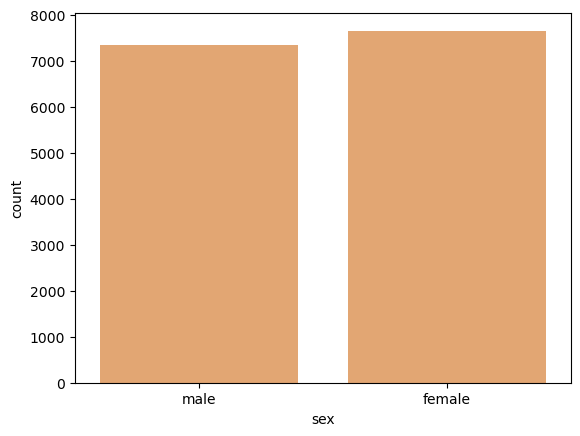

In [81]:
sns.countplot(x='sex',data=df,color='sandybrown')
plt.show()

To quickly understand class distribution (e.g- gender distribution, yes/no responses, etc.)                                                                           
OUTPUT-male   7500                                                                                                                                            
female   7800

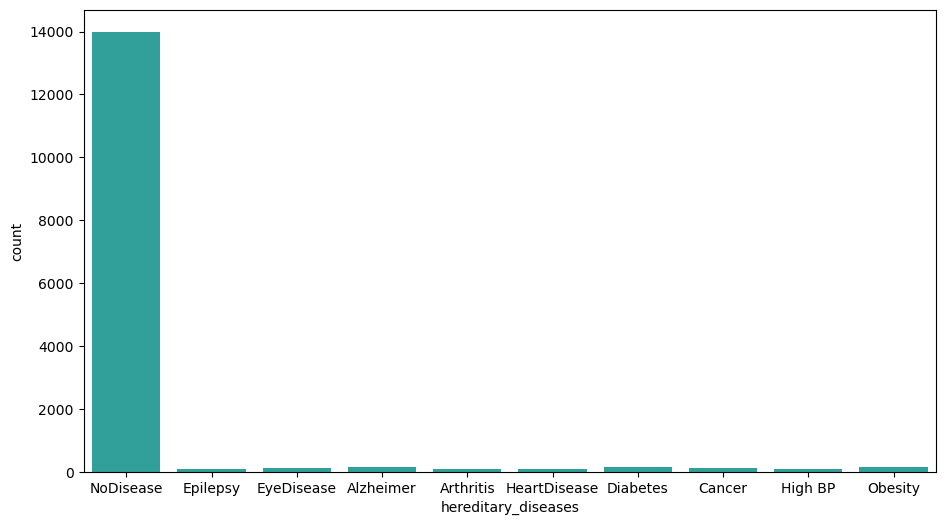

In [84]:
plt.figure(figsize=(11,6))
sns.countplot(x='hereditary_diseases',data=df, color='lightseagreen')
plt.show()

This code creates a bar chart that shows the count (frequency) of each unique value in the column 'hereditary_diseases' from the DataFrame.                       
OUTPUT-NoDiease   13980                                                                                                                                        
Epilepsy     30                                                                                                                                            
EyeDisease   60                                                                                                                                            
Alzheimer    50                                                                                                                                                
Arthritis    30                                                                                                                                                 
HeartDisease 20                                                                                                                                              
Diabetes     100                                                                                                                                                 
Cancer       70                                                                                                                                                      
High BP      90                                                                                                                                              
Obesity      80

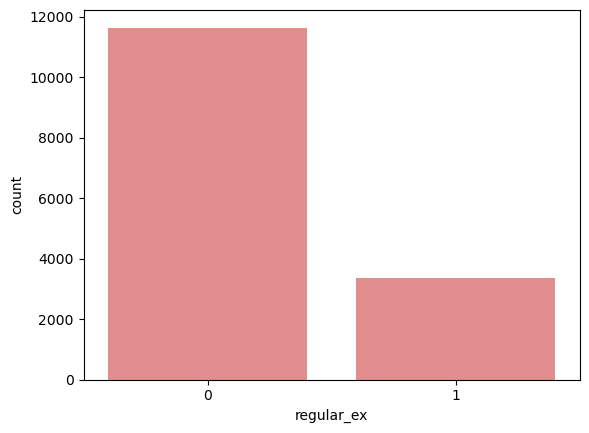

In [87]:
sns.countplot(x='regular_ex',data=df,color='lightcoral')
plt.show()

This method is useful for visualizing the distribution of a categorical column — in this case, probably something like whether people exercise regularly.                                                                                                                                                    
OUTPUT- female    0 (11500)                                                                                                                                     
male     1 (3000)

# Piechart

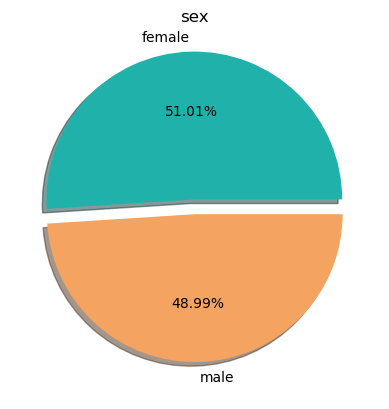

In [91]:
values = df.sex.value_counts().values
labels = df.sex.value_counts().keys()
explode = (0.1,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['lightseagreen','sandybrown'])
plt.title('sex')
plt.show()

In this case, it's used to show how many males and females are present in the dataset and what percentage each category represents.

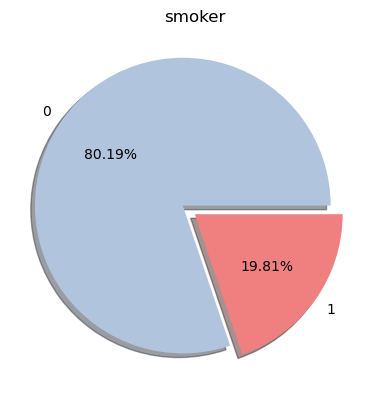

In [94]:
values = df.smoker.value_counts().values
labels = df.smoker.value_counts().keys()
explode = (0.1,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['lightsteelblue','lightcoral'])
plt.title('smoker')
plt.show()

It gives a quick visual of how many people are smokers vs non-smokers, and what percentage each group represents.

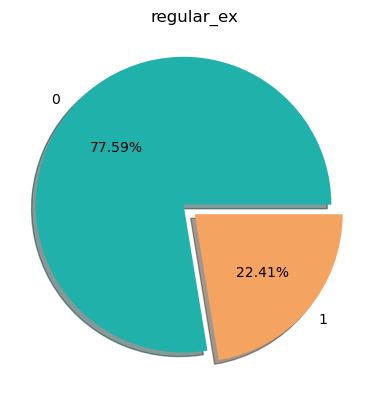

In [97]:
values = df.regular_ex.value_counts().values
labels = df.regular_ex.value_counts().keys()
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['lightseagreen','sandybrown'])
plt.title('regular_ex')
plt.show()

This code visualizes how many people do regular exercise vs. those who don’t in the regular_ex column using a pie chart.                                      
Understand how many people follow a regular exercise routine.

# Numerical Data

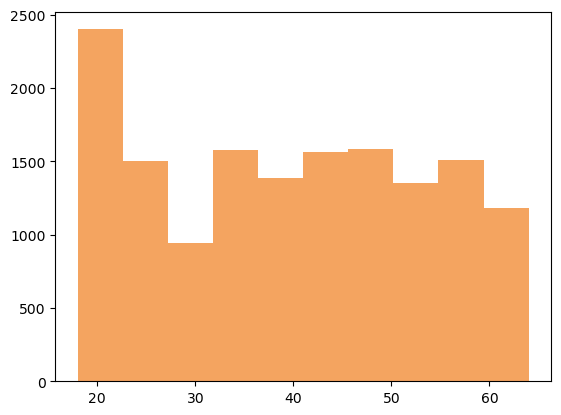

In [101]:
plt.hist(df['age'],color='sandybrown')
plt.show()

A histogram shows the distribution of numerical data — in this case, how the values in the 'age' column are spread.                                           
It divides the age values into intervals (called bins) and counts how many values fall into each interval.

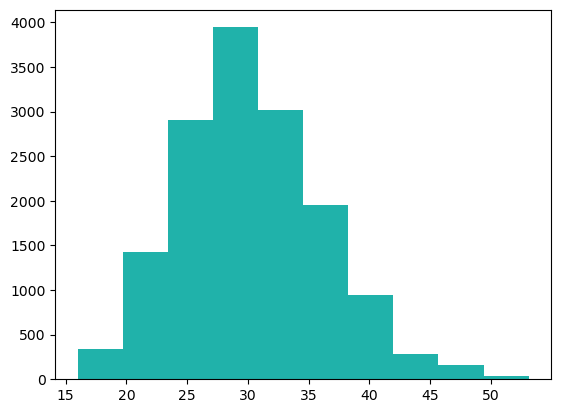

In [104]:
plt.hist(df['bmi'],color='lightseagreen')
plt.show()

A histogram is a graph that shows how often each range of values (called "bins") occurs in a dataset.                                                       
OUTPUT-The x-axis shows the range of BMI values (e.g., 15–20, 20–25, etc.).                                                                                 
The y-axis shows the count of data points (how many people fall into each BMI range).

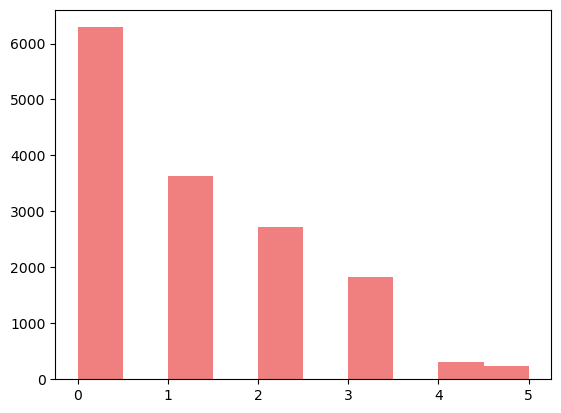

In [107]:
plt.hist(df['no_of_dependents'],color='lightcoral')
plt.show()

Histograms are used to display the distribution of numerical data by grouping the data into "bins" (intervals) and counting how many data points fall into each bin.                                                                                                                                           
OUUTPUT-X-axis: Represents the different bins (ranges) of values in the 'no_of_dependents' column. (eg. 0-1, 1-2).                                                       
Y-axis: Represents the frequency (or count) of data points that fall into each bin.

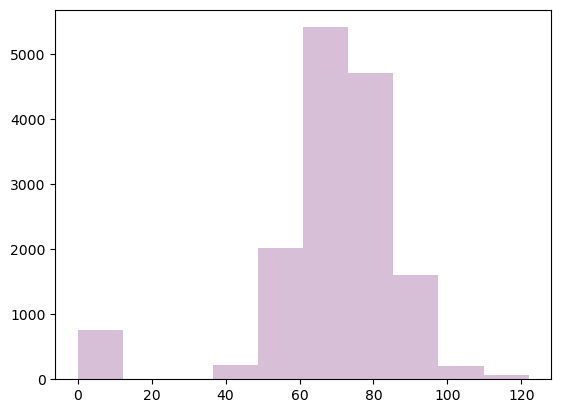

In [110]:
plt.hist(df['bloodpressure'],color='thistle')
plt.show()

It helps visualize the distribution of the bloodpressure values in the dataset.                                                                                
OUTPUT-The x-axis would represent ranges like [110-120], [120-130], [130-140], etc.                                                                         
The y-axis would represent how many blood pressure values fall into each range.

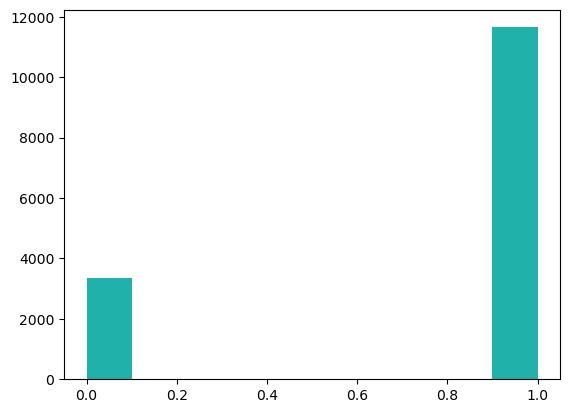

In [113]:
plt.hist(df['diabetes'],color='lightseagreen')
plt.show()

is used to create a histogram of the diabetes column in your dataset (df), with a specific color for the bars (lightseagreen).

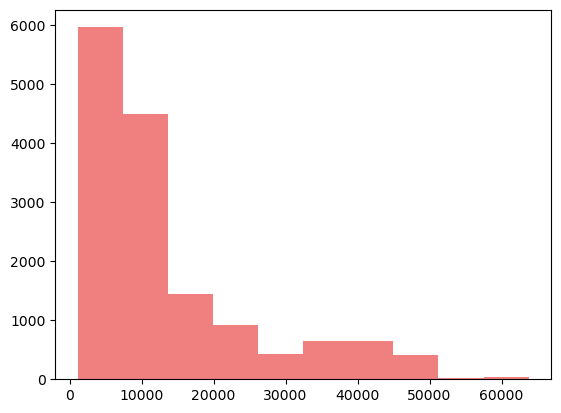

In [116]:
plt.hist(df['claim'],color='lightcoral')
plt.show()

This creates a histogram based on the values in the claim column of the DataFrame df.                                                                      
A histogram is a graphical representation of the distribution of numerical data, where the data is divided into bins , and the frequency of data points falling into each bin is represented as a bar.                                                                                                              
OUTPUT-Show the frequency (y-axis) of claim values that fall within specific ranges or bins on the x-axis.

# Distribution plot

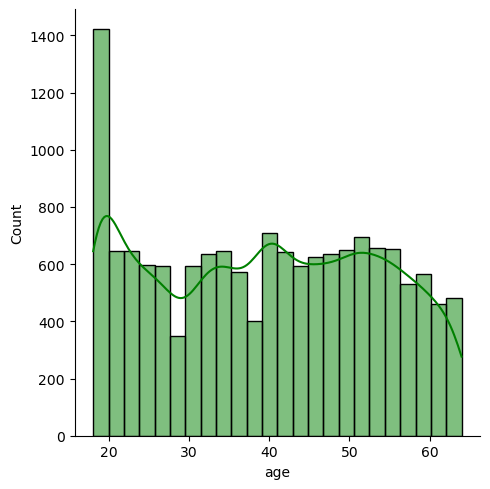

In [120]:
sns.displot(x='age',data=df,color='green',kde=True)
plt.show()

It is used to create a distribution plot of the data in the "age" column of the DataFrame df                                     
OUTPUT-The bars represent how many data points fall within specific age ranges (e.g., how many people have an age between 20-25, 25-30, etc.).

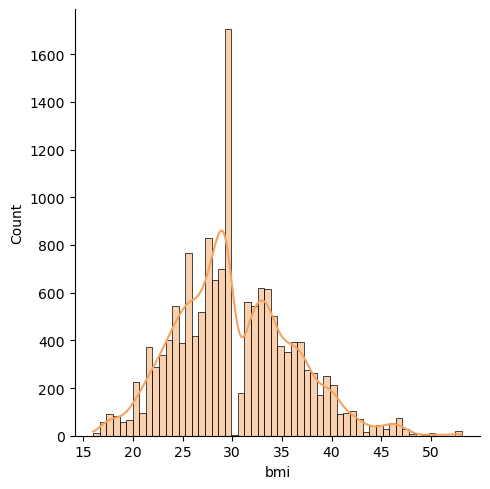

In [123]:
sns.displot(x='bmi',data=df,color='sandybrown',kde=True)
plt.show()

It helps to understand how the 'bmi' values are distributed. You can check if it follows a normal distribution, is skewed, or has any other interesting patterns.                                                                                                                                      
OUTPUT-The bars of the histogram will show how many values fall within certain intervals (e.g., BMI values between 20-25, 25-30, etc.).

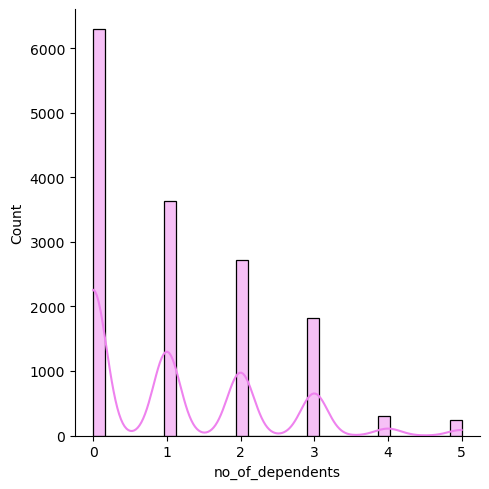

In [125]:
sns.displot(x='no_of_dependents',data=df,color='violet',kde=True)
plt.show()

It creates a histogram of the no_of_dependents column to show how the values are distributed (e.g., how many rows have a certain number of dependents).                                                                                                                                                
OUTPUT-The x-axis will represent the number of dependents (no_of_dependents), and the y-axis will show the frequency (count) of each number of dependents

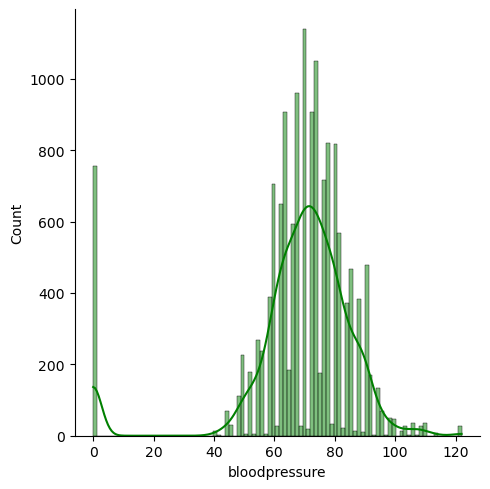

In [128]:
sns.displot(x='bloodpressure',data=df,color='green',kde=True)
plt.show()

This line creates a distribution plot (histogram + KDE) for the bloodpressure column in your dataset df.                                                          
OUTPUT-Bars showing how many times each range (bin) of blood pressure occurs.                                                                                 
A green curve representing the estimated continuous distribution of blood pressure.

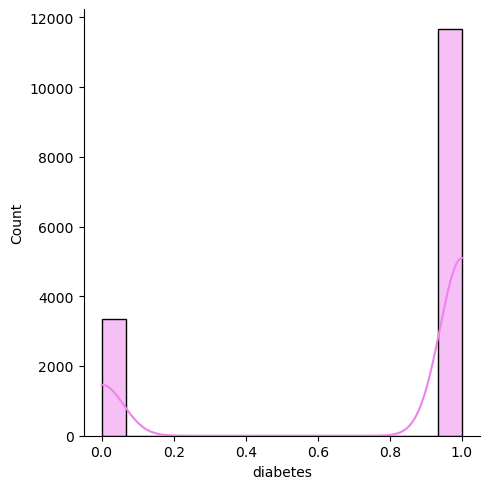

In [132]:
sns.displot(x='diabetes',data=df,color='violet',kde=True)
plt.show()

A histogram of the diabetes column — how frequently each value appears.                                                                                     
kde=True adds a KDE curve, which is a smooth approximation of the histogram (like a line graph over the bars).

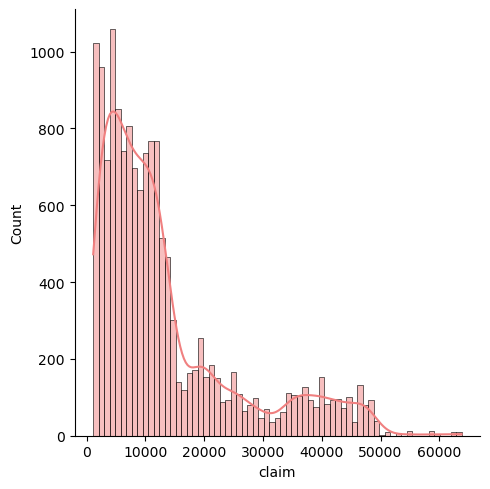

In [135]:
sns.displot(x='claim',data=df,color='lightcoral',kde=True)
plt.show()

Understanding how claims are distributed (e.g., most values are low, or clustered around a mean).                                                             
Identifying outliers or skewness.                                                                                                                           
OUTPUT-Bars showing how many records fall into each value range of claim.                                                                                    
A smooth KDE curve overlayed on top to help visualize the distribution trend.

# Bivariate

# Bar Plot(Numerical-Categorical)

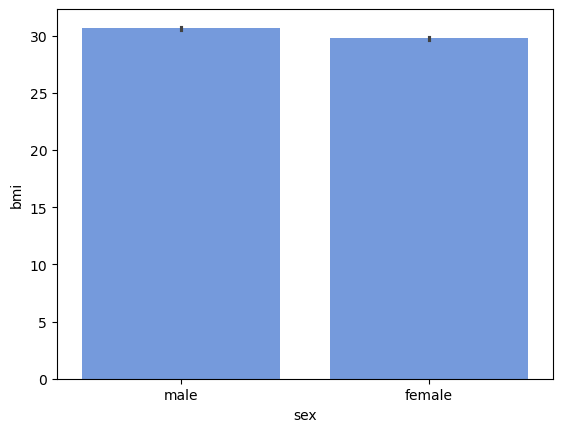

In [140]:
sns.barplot(x='sex',y='bmi',data=df,color='cornflowerblue')
plt.show()

It calculates the mean BMI for each value of "sex" in your dataset.                                                                                             
Then it draws a bar for each sex category where the height = average BMI for that group.                                                                      
OUTPT-The average BMI for male                                                                                                       
The average BMI for female 

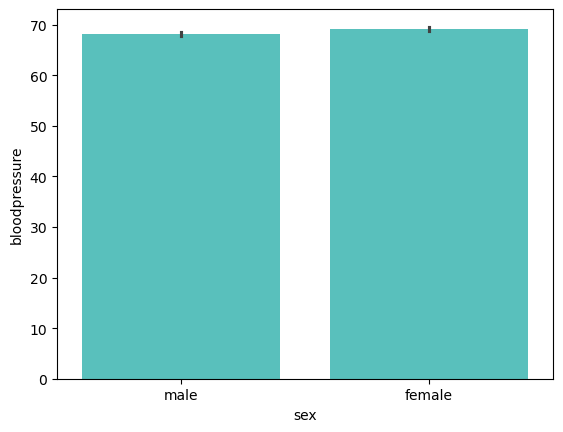

In [143]:
sns.barplot(x='sex',y='bloodpressure',data=df,color='mediumturquoise')
plt.show()

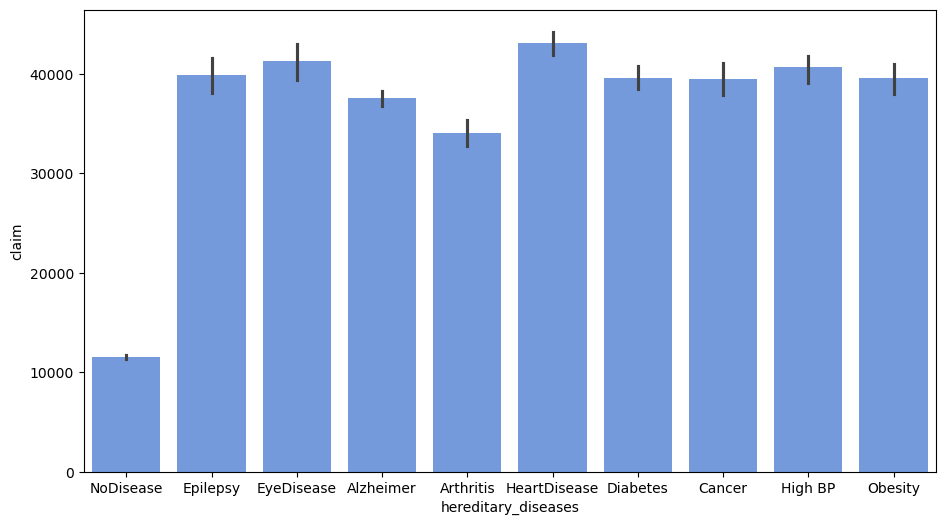

In [144]:
plt.figure(figsize=(11,6))
sns.barplot(x='hereditary_diseases',y='claim',data=df,color='cornflowerblue')
plt.show()

You're using Seaborn's barplot to create a bar chart that shows the relationship between hereditary diseases and claim values.                                   
OUTPUT-Each bar represents a category in the hereditary_diseases column (e.g., "Yes" and "No").                                                                   
The height of the bar shows the average value of claim for that category.

# Line plot

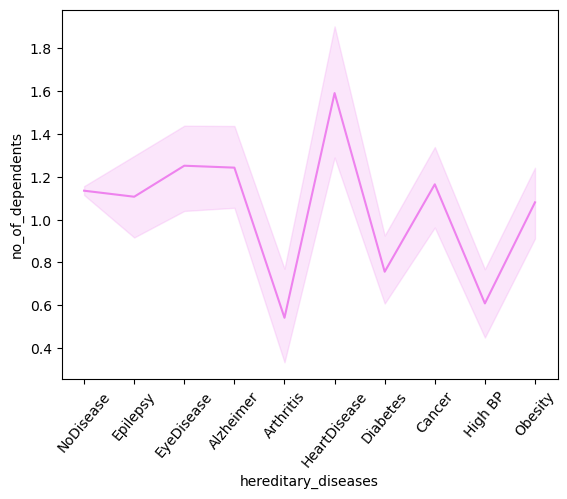

In [149]:
sns.lineplot(x='hereditary_diseases',y='no_of_dependents',data=df,color='violet')
plt.xticks(rotation=50)
plt.show()

It shows how the number of dependents (y-axis) varies for different hereditary diseases (x-axis).                                                          
OUTPUT-("Diabetes", 2)                                                                                                                                      
("Heart Disease", 4)                                                                                                                                            
("Cancer", 1)

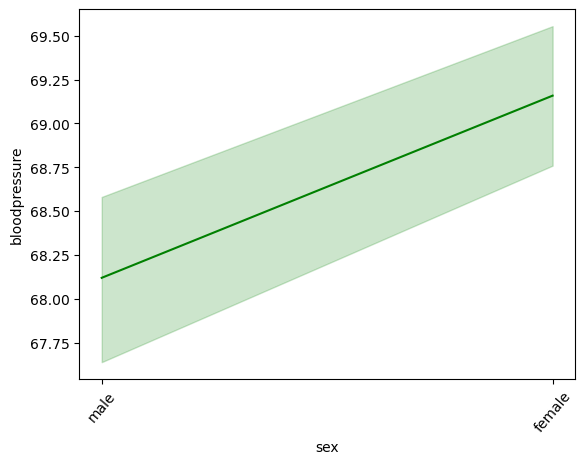

In [151]:
sns.lineplot(x='sex',y='bloodpressure',data=df,color='green')
plt.xticks(rotation=50)
plt.show()

Comparing blood pressure trends by gender.                                                                                                                       
Visualizing group differences in health-related data                                                                                                         
OUUTPUT- average male bloodpressure  68.20                                                                                                                     
 average female bloodpressure   69.00

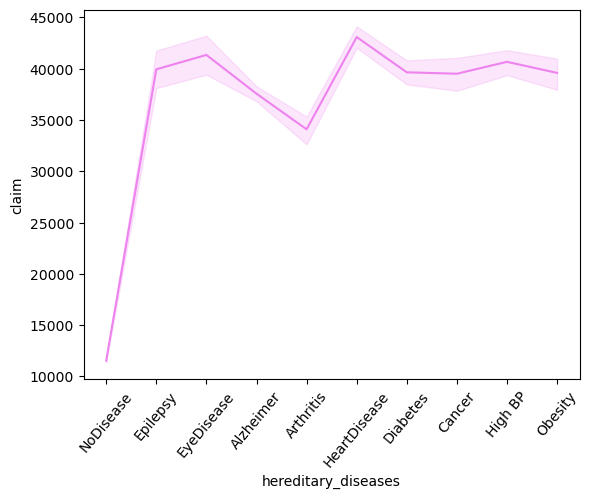

In [155]:
sns.lineplot(x='hereditary_diseases',y='claim',data=df,color='violet')
plt.xticks(rotation=50)
plt.show()

This plot helps you visually understand the relationship between the type of hereditary diseases and the claim.                                             


# Multivariate

# Scatterplot(Numerical-Numerical)

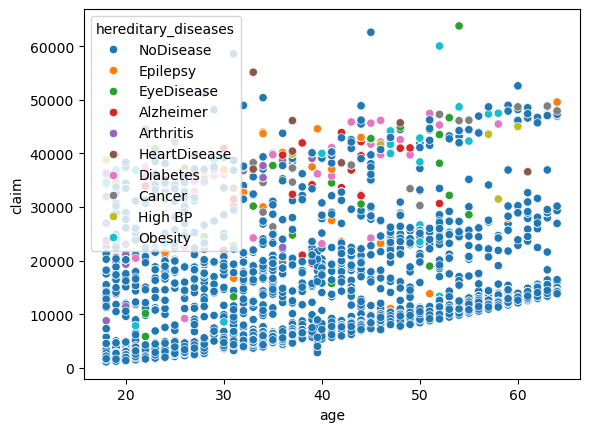

In [159]:
sns.scatterplot(x='age',y='claim',hue='hereditary_diseases',data=df)
plt.show()

using Seaborn's scatterplot() function to visualize the relationship between different variables in your dataset                                            
OUTPUT-Each dot represents a row (a person or record) in the DataFrame.                                                                                       
The x-position of the dot is that person’s age.                                                                                                                
The y-position is the claim value (could be amount or binary: 0 or 1).                                                                                           
The color of the dot (set by hue) shows the hereditary disease status.

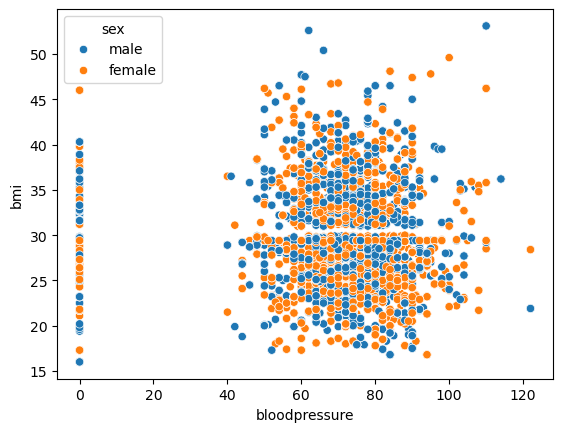

In [162]:
sns.scatterplot(x='bloodpressure',y='bmi',hue='sex',data=df)
plt.show()

To visualize relationships between bloodpressure and bmi.                                                                                                   
OUTPUT-X-axis = Blood pressure.                                                                                                                                 
Y-axis = BMI.

# Barplot(Categorical-Numerical)


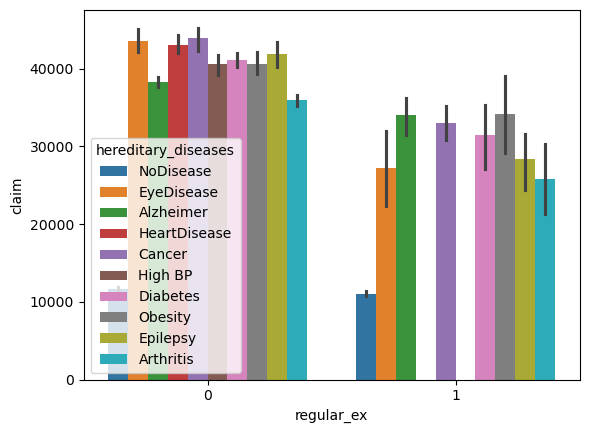

In [167]:
sns.barplot(x='regular_ex',y='claim',hue='hereditary_diseases',data=df)
plt.show()

the seaborn library to create a barplot to visualize the relationship between categorical and numerical variables in a dataset.                              
OUTPUT-You'll see bars for "Yes" and "No" under regular_ex (regular exercise vs no exercise).

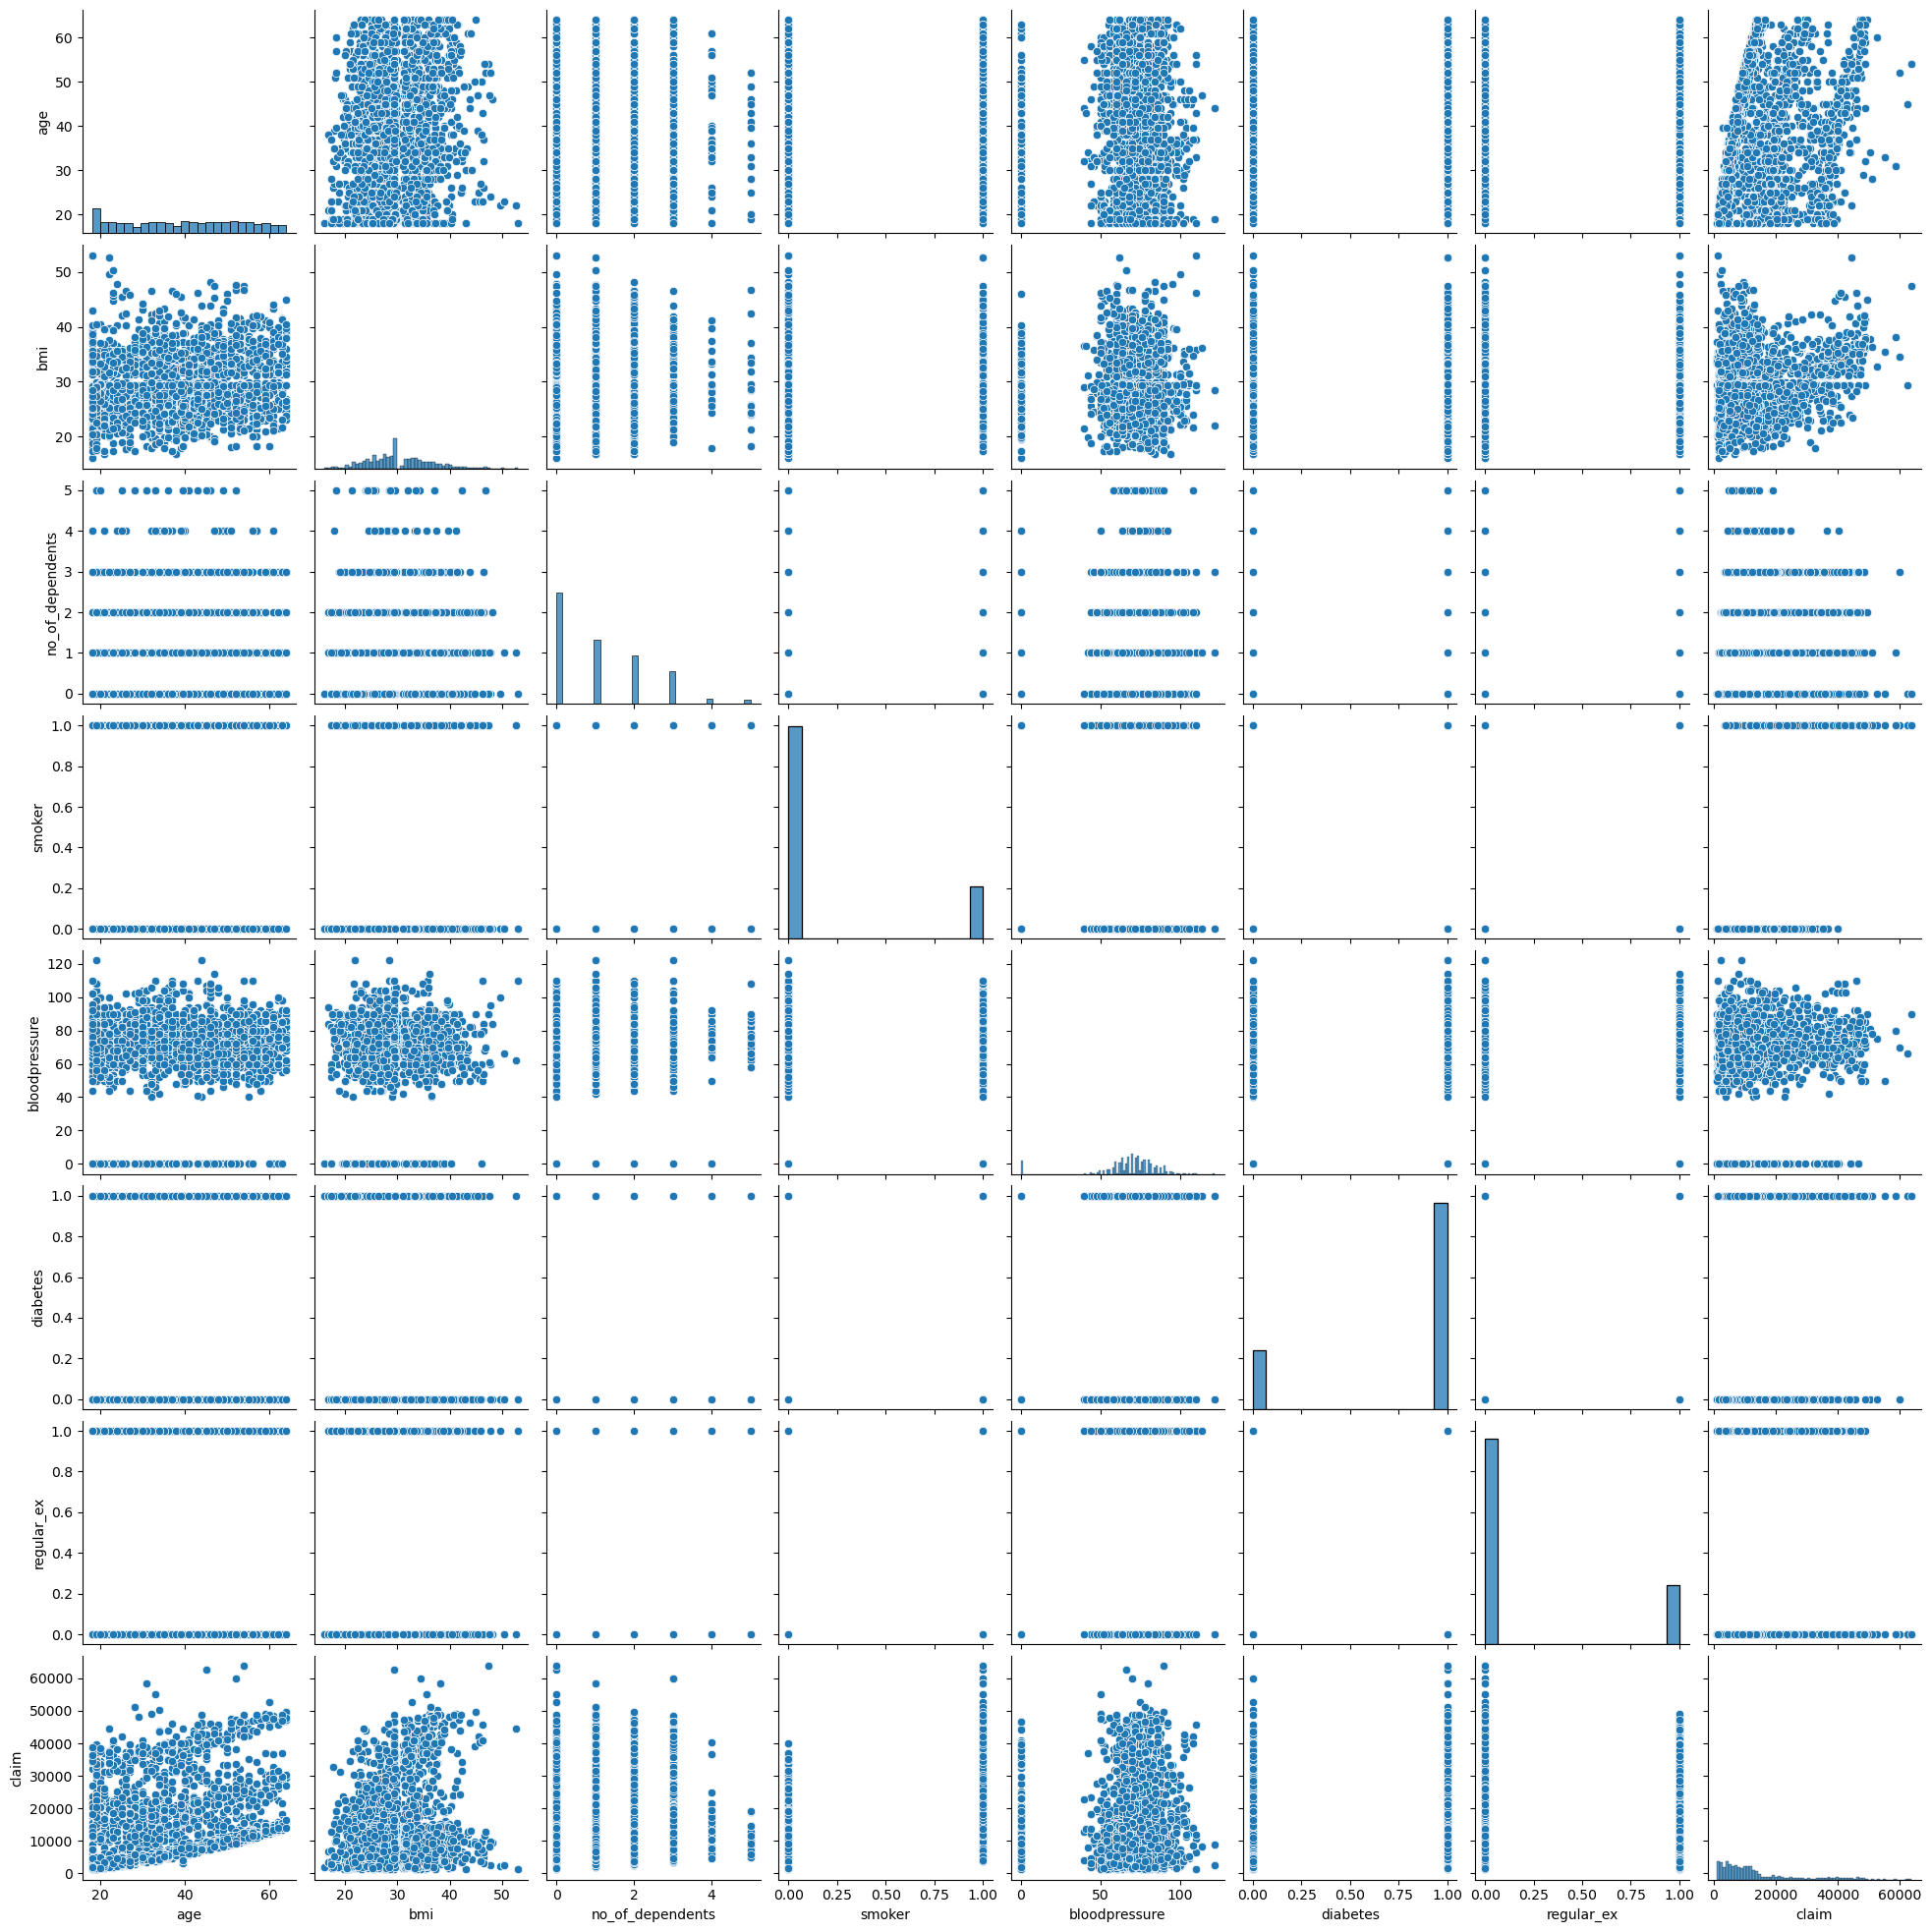

In [170]:
sns.pairplot(df)
plt.show()

It shows scatterplots for each pair of numeric columns in the DataFrame df.                                                                                      
OUTPUT-Scatterplots for each pair of variables (e.g., petal length vs. petal width).

# box plot

In [174]:
cat_col=['sex','hereditary_diseases','city','job_title','smoker','regular_ex']
num_col = ['age','bmi','no_of_dependents','bloodpressure','diabetes','claim']

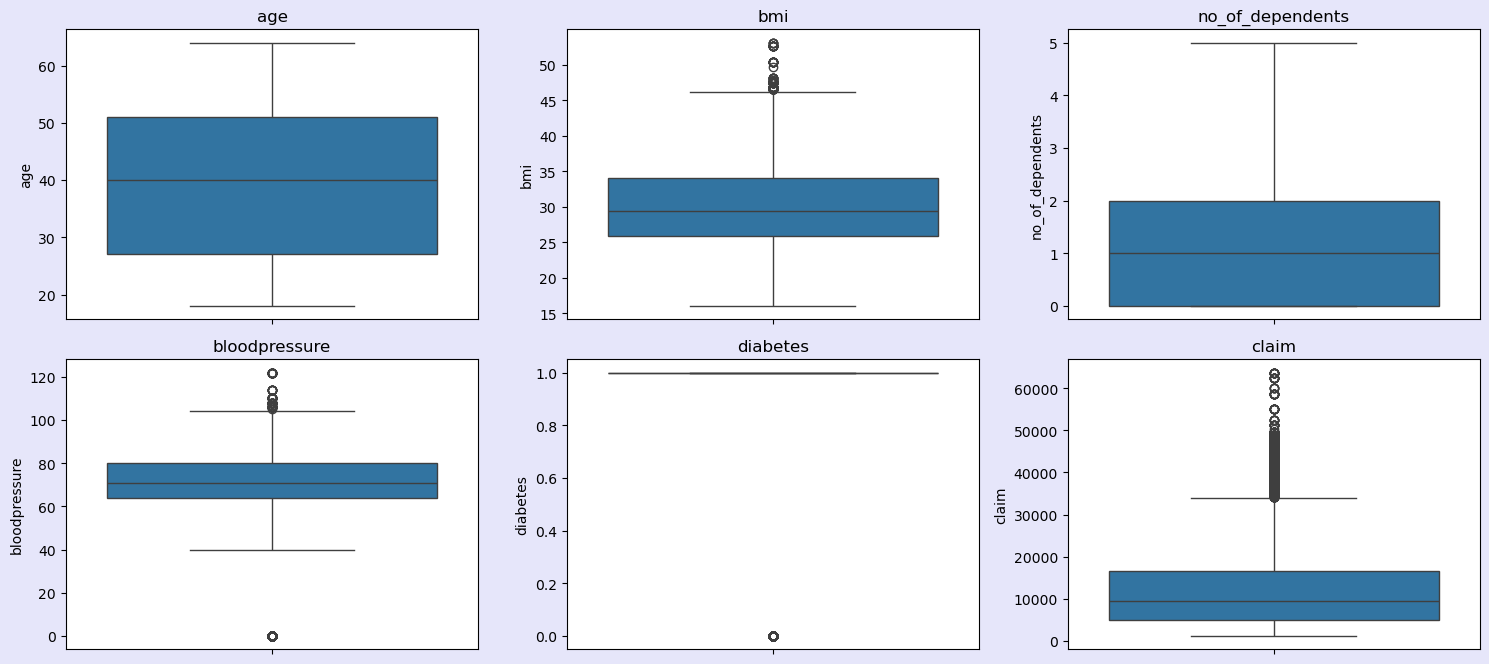

In [176]:
plt.figure(figsize=(15, 10),facecolor='lavender')

for i, column in enumerate(num_col, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Find  the outliers.                                                                                                                             
This code creates multiple boxplots—one for each numerical column in a DataFrame. It helps visualize the distribution and detect outliers for each numeric feature.                                                                                                                 
OUTPUT-The output is a grid of boxplots—each showing the distribution of values in one numeric column.

# remove outliers

In [180]:
for col in num_col:
    if df[col].dtype in [np.float64, np.int64]: 
        Q1=df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] =np.where(df[col] > upper_bound, upper_bound, df[col])

The code you shared is used in data preprocessing to handle outliers in numerical columns of a dataset                                            
To cap (limit) extreme high values (outliers) in numerical columns using the IQR (Interquartile Range) method                                   
Q1 = 25th percentile                                                                                                                           
Q3 = 75th percentile                                                                                                                          
IQR = Q3 - Q1 (middle 50% range)

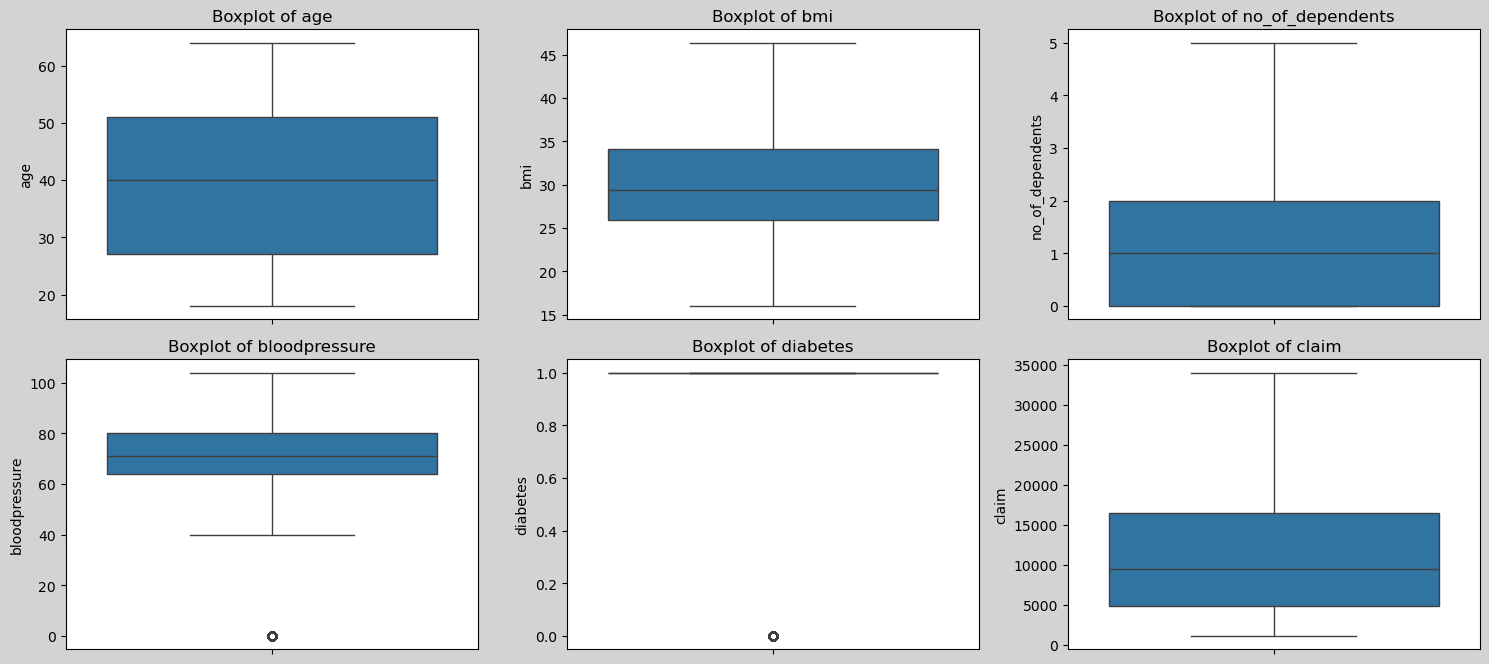

In [183]:
counter = 1
plt.figure(figsize=(15, 10),facecolor='lightgrey')

for col in num_col:
    plt.subplot(3, 3, counter)  
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    counter += 1  

plt.tight_layout()
plt.show()

To Check outliers in every column                                                                                                                
There is no oultiers.

# Encoding

In [186]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder

In [187]:
lab_enc=LabelEncoder()

In [188]:
df1=lab_enc.fit_transform(df['sex'])
df['sex']=df1
df

,age,sex,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,24.3,NoDisease,1.0,0,NewYork,72.0,0.0,0,Actor,13112.6000
1,49.0,0,22.6,NoDisease,1.0,0,Boston,78.0,1.0,1,Engineer,9567.0000
2,32.0,0,17.8,Epilepsy,2.0,1,Phildelphia,88.0,1.0,1,Academician,32734.2000
3,61.0,0,36.4,NoDisease,1.0,1,Pittsburg,72.0,1.0,0,Chef,34027.4625
4,19.0,0,20.6,NoDisease,0.0,0,Buffalo,82.0,1.0,0,HomeMakers,1731.7000
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,28.3,NoDisease,1.0,1,Florence,54.0,1.0,0,FilmMaker,21082.2000
14996,39.0,1,29.6,NoDisease,4.0,0,Miami,64.0,1.0,0,Student,7512.3000
14997,20.0,1,33.3,NoDisease,0.0,0,Tampa,52.0,1.0,0,FashionDesigner,1391.5000
14998,52.0,1,36.7,NoDisease,0.0,0,PanamaCity,70.0,1.0,0,Farmer,9144.6000


This code uses label encoding to convert the categorical column "sex" into numeric

In [191]:
bE = BinaryEncoder()

In [192]:
df2 = bE.fit_transform(df['hereditary_diseases'])
df2

,hereditary_diseases_0,hereditary_diseases_1,hereditary_diseases_2,hereditary_diseases_3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
14995,0,0,0,1
14996,0,0,0,1
14997,0,0,0,1
14998,0,0,0,1


In [193]:
df_encoded= bE.fit_transform(df[['hereditary_diseases']])
df= pd.concat([df.drop(columns=['hereditary_diseases']),df_encoded],axis=1)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    15000 non-null  float64
 1   sex                    15000 non-null  int32  
 2   bmi                    15000 non-null  float64
 3   no_of_dependents       15000 non-null  float64
 4   smoker                 15000 non-null  int64  
 5   city                   15000 non-null  object 
 6   bloodpressure          15000 non-null  float64
 7   diabetes               15000 non-null  float64
 8   regular_ex             15000 non-null  int64  
 9   job_title              15000 non-null  object 
 10  claim                  15000 non-null  float64
 11  hereditary_diseases_0  15000 non-null  int64  
 12  hereditary_diseases_1  15000 non-null  int64  
 13  hereditary_diseases_2  15000 non-null  int64  
 14  hereditary_diseases_3  15000 non-null  int64  
dtypes:

In [202]:
df2 = bE.fit_transform(df['city'])
df2

,city_0,city_1,city_2,city_3,city_4,city_5,city_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
14995,0,1,0,0,1,1,0
14996,0,1,0,0,1,1,1
14997,0,1,0,1,0,0,0
14998,0,1,0,1,0,0,1


In [204]:
df_encoded= bE.fit_transform(df[['city']])
df= pd.concat([df.drop(columns=['city']),df_encoded],axis=1)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    15000 non-null  float64
 1   sex                    15000 non-null  int32  
 2   bmi                    15000 non-null  float64
 3   no_of_dependents       15000 non-null  float64
 4   smoker                 15000 non-null  int64  
 5   bloodpressure          15000 non-null  float64
 6   diabetes               15000 non-null  float64
 7   regular_ex             15000 non-null  int64  
 8   job_title              15000 non-null  object 
 9   claim                  15000 non-null  float64
 10  hereditary_diseases_0  15000 non-null  int64  
 11  hereditary_diseases_1  15000 non-null  int64  
 12  hereditary_diseases_2  15000 non-null  int64  
 13  hereditary_diseases_3  15000 non-null  int64  
 14  city_0                 15000 non-null  int64  
 15  ci

In [208]:
df2 = bE.fit_transform(df['job_title'])
df2

,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
14995,0,1,1,0,0,1
14996,0,0,1,0,1,0
14997,0,1,0,1,1,0
14998,1,0,0,0,0,0


In [210]:
df_encoded= bE.fit_transform(df[['job_title']])
df= pd.concat([df.drop(columns=['job_title']),df_encoded],axis=1)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    15000 non-null  float64
 1   sex                    15000 non-null  int32  
 2   bmi                    15000 non-null  float64
 3   no_of_dependents       15000 non-null  float64
 4   smoker                 15000 non-null  int64  
 5   bloodpressure          15000 non-null  float64
 6   diabetes               15000 non-null  float64
 7   regular_ex             15000 non-null  int64  
 8   claim                  15000 non-null  float64
 9   hereditary_diseases_0  15000 non-null  int64  
 10  hereditary_diseases_1  15000 non-null  int64  
 11  hereditary_diseases_2  15000 non-null  int64  
 12  hereditary_diseases_3  15000 non-null  int64  
 13  city_0                 15000 non-null  int64  
 14  city_1                 15000 non-null  int64  
 15  ci

# heatmap

In [215]:
correlation=df.corr(numeric_only=True)

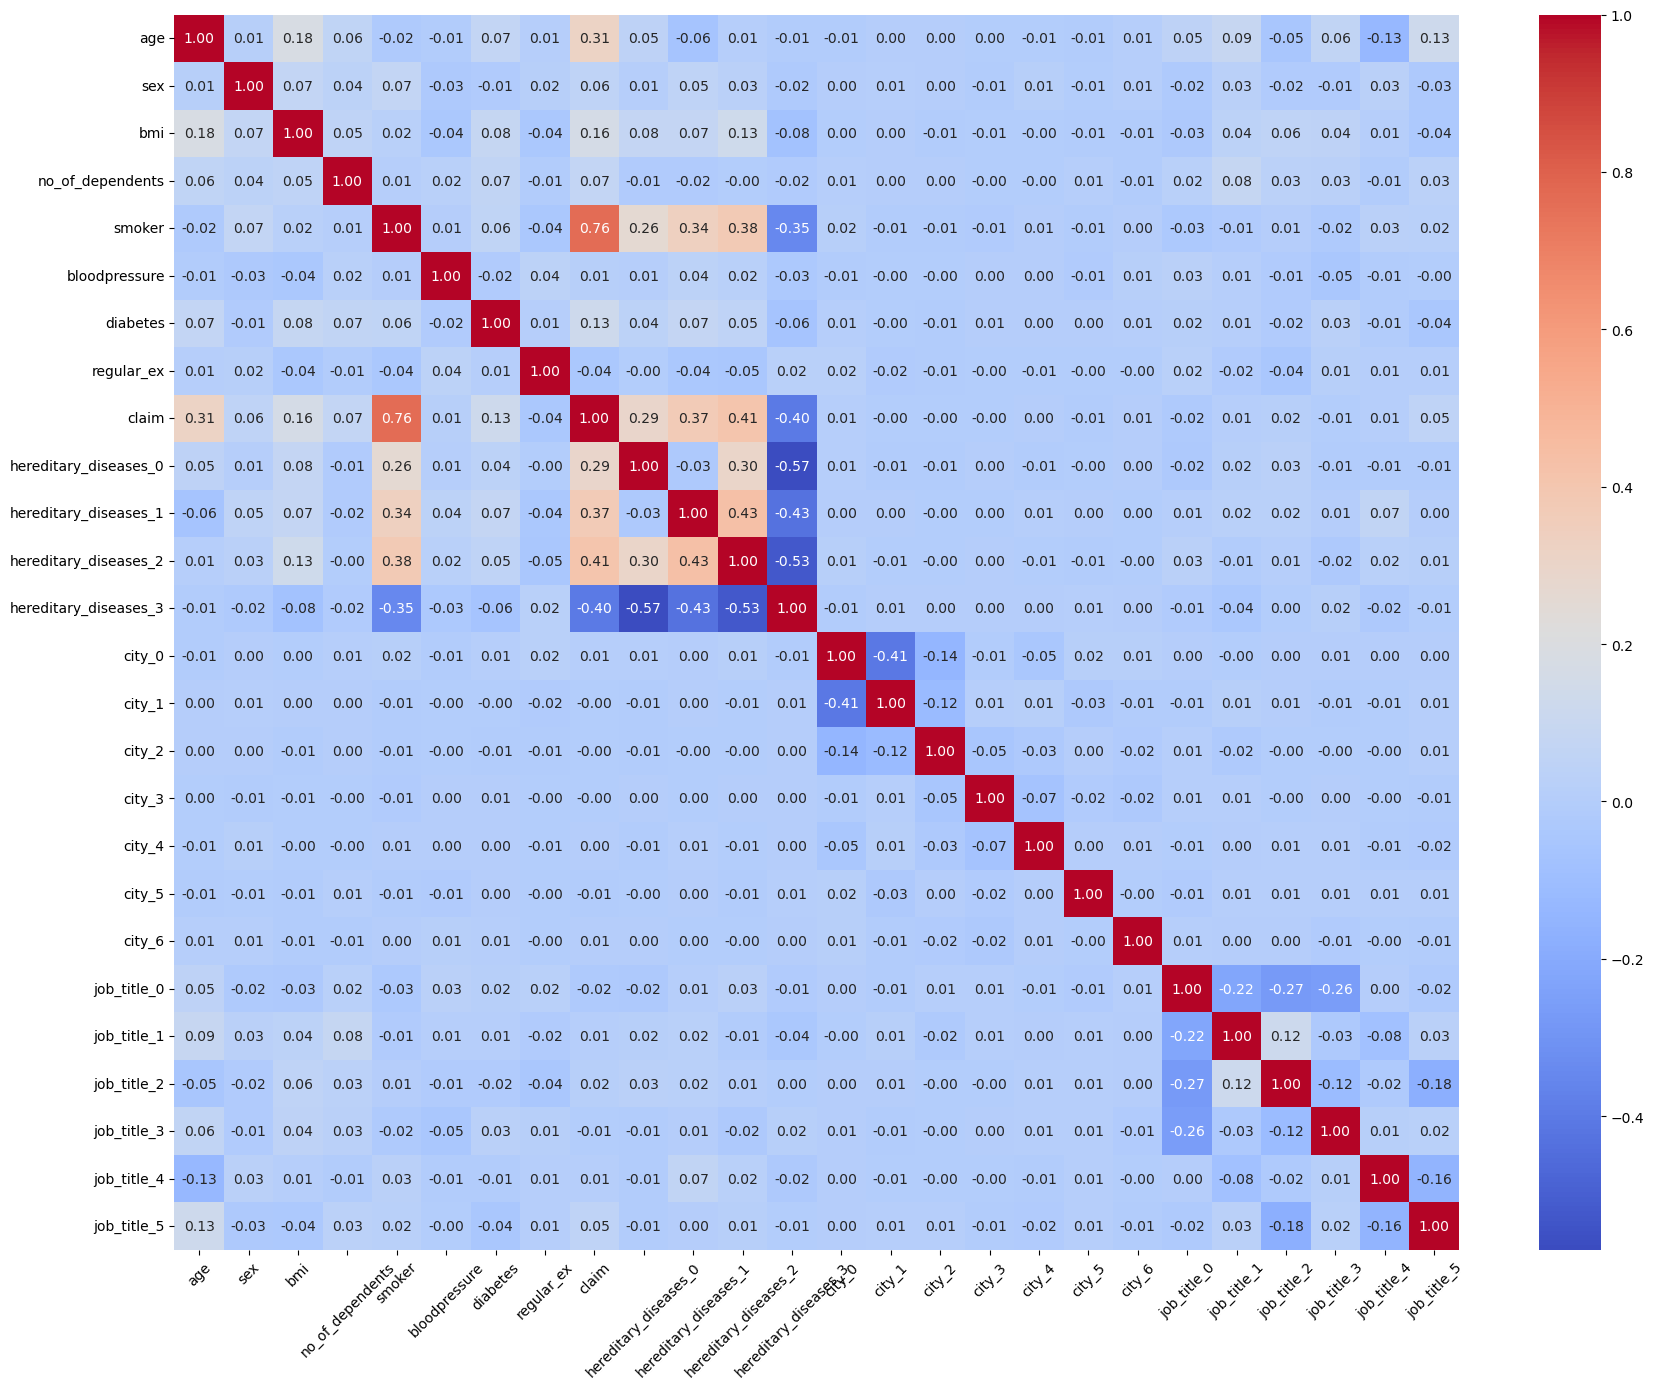

In [217]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

df.corr()=computes the correlation between numerical columns                                                                                 
sns.heatmap()=is used to visualize the correlation matrix                                                                                                                
annot=True shows the correlation values inside the heatmap                                                                                     
cmap="coolwarm" applies a color gradient for better visualization

# x-y split

In [221]:
x=df.drop('claim',axis=1)
x

,age,sex,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,hereditary_diseases_0,hereditary_diseases_1,...,city_3,city_4,city_5,city_6,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5
0,60.0,1,24.3,1.0,0,72.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,49.0,0,22.6,1.0,0,78.0,1.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,32.0,0,17.8,2.0,1,88.0,1.0,1,0,0,...,0,0,1,1,0,0,0,0,1,1
3,61.0,0,36.4,1.0,1,72.0,1.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,19.0,0,20.6,0.0,0,82.0,1.0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,28.3,1.0,1,54.0,1.0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
14996,39.0,1,29.6,4.0,0,64.0,1.0,0,0,0,...,0,1,1,1,0,0,1,0,1,0
14997,20.0,1,33.3,0.0,0,52.0,1.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
14998,52.0,1,36.7,0.0,0,70.0,1.0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


Removes the 'claim' column from the DataFrame.                                                                                                  
axis=1 means you're dropping a column (not a row).

In [224]:
y=df[['claim']]
y

,claim
0,13112.6000
1,9567.0000
2,32734.2000
3,34027.4625
4,1731.7000
...,...
14995,21082.2000
14996,7512.3000
14997,1391.5000
14998,9144.6000


Keeps only the 'claim' column.

# Standard Scaler

In [228]:
from sklearn.preprocessing import StandardScaler

In [230]:
scaler = StandardScaler()

In [232]:
s_scaled=scaler.fit_transform(x)
s_scaled

array([[ 1.47892959,  1.02047626, -1.00303536, ..., -0.92432144,
        -1.01180298,  0.96953064],
       [ 0.68351375, -0.9799346 , -1.29229951, ..., -0.92432144,
         0.9883347 , -1.03142692],
       [-0.54576526, -0.9799346 , -2.10904536, ..., -0.92432144,
         0.9883347 ,  0.96953064],
       ...,
       [-1.41349163,  1.02047626,  0.5283631 , ...,  1.08187472,
         0.9883347 , -1.03142692],
       [ 0.90044535,  1.02047626,  1.1068914 , ..., -0.92432144,
        -1.01180298, -1.03142692],
       [ 0.90044535,  1.02047626, -0.64570905, ...,  1.08187472,
        -1.01180298, -1.03142692]])

Import the StandardScaler class from scikit-learn.                                                                                               
Initialize the StandardScaler object.                                                                                                          
Each column now has mean = 0, std = 1                                                                                                             
You can feed this s_scaled directly into a machine learning model

# vif

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors.

In [239]:
vif=pd.DataFrame()

This line simply initializes an empty pandas DataFrame named vif. It will usually be used to store VIF values for the features (independent variables) in a dataset.

In [242]:
vif['vif']=[variance_inflation_factor(s_scaled,i) for i in range(s_scaled.shape[1])]

is calculating the VIF for each feature (column) in your dataset after scaling it using StandardScaler.

In [244]:
vif['Features']=x.columns
vif

,vif,Features
0,1.101350,age
1,1.020379,sex
2,1.083198,bmi
3,1.028577,no_of_dependents
4,1.296470,smoker
5,1.011292,bloodpressure
6,1.027344,diabetes
7,1.009852,regular_ex
8,1.803424,hereditary_diseases_0
9,1.668832,hereditary_diseases_1


This code adds the column names of your dataset (x.columns) to a DataFrame called vif                                                            
OUTPUT-1.101350	age                                                                                                                           	1.02037    sex                                                                                                                                                                                                                                                          2	1.083198	bmi

# train_test_split

In [247]:
from sklearn.model_selection import train_test_split

The method is used to split your dataset into two parts                                                                                        
1- Training set                                                                                                                                
2- Testing set

In [249]:
x_train,x_test,y_train,y_test=train_test_split(s_scaled,y,test_size=0.3,random_state=42)

# Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression

This is a machine learning model used for predicting a continuous target/output variable based on one or more input features. It assumes a linear relationship between input and output 

In [255]:
lr=LinearRegression()

In [257]:
lr.fit(s_scaled,y)

LinearRegression()

This line is fitting a machine learning model — in this case, probably Linear Regression or Logistic Regression, depending on how lr was defined.

In [260]:
x_pre=lr.predict(x_test)
x_pre

array([[10910.21151293],
       [ 2271.03447111],
       [ 7348.80538274],
       ...,
       [ 5940.84585342],
       [ 6170.80670364],
       [14859.47602186]])

In [261]:
y_pre=lr.predict(x_train)
y_pre

array([[ 8932.77665577],
       [13767.84901587],
       [ 9909.54620565],
       ...,
       [14103.18823906],
       [ 5797.92208923],
       [30049.12921856]])

# r2 score

In [268]:
from sklearn.metrics import r2_score

The r2_score function from sklearn.metrics is used to evaluate the performance of a regression model by calculating the coefficient of determination (R²).

In [271]:
r2_score(y_train,y_pre)

0.7369970439720541

It tells you how well the predicted values (y_pred) match the actual values (y_train) in your dataset.                                                
R² score ranges from −∞ to 1:

1: Perfect prediction

0: Model performs no better than simply predicting the mean of y_train

In [274]:
r2_score(y_test,x_pre)

0.7258645570400757

That means 72.58% of the variance in y_test is explained by x_pre.

# mean absolute error

In [278]:
from sklearn.metrics import mean_absolute_error

It calculates the Mean Absolute Error (MAE), which is the average of the absolute differences between predicted values and actual values.

In [281]:
mean_absolute_error(y_test,x_pre)

3393.872714636905

Lower values indicate better performance (closer predictions).

Zero means perfect prediction.



# mean squared error

In [285]:
from sklearn.metrics import mean_squared_error

It is a common metric to evaluate the performance of regression models.

In [288]:
mean_squared_error(y_test,x_pre)

27483502.718077235

Lower MSE = better model performance.

Higher MSE = worse model performance (more prediction error).

# knn

In [292]:
from sklearn.neighbors import KNeighborsRegressor

The KNeighborsRegressor from the sklearn.neighbors module is used for regression tasks in machine learning. It implements the K-Nearest Neighbors (KNN) algorithm for regression, 

In [295]:
knn=KNeighborsRegressor()

When you use the KNeighborsRegressor(), you get a model that can be used to predict the target variable for new input data.

In [298]:
knn.fit(s_scaled,y)

KNeighborsRegressor()

The .fit() method makes the model "learn" the relationship between the input data (s_scaled) and the target data (y).

In [301]:
x_pred=knn.predict(x_test)
x_pred

array([[ 8930.32],
       [ 2552.24],
       [ 5148.6 ],
       ...,
       [ 4885.72],
       [ 3801.04],
       [13063.98]])

This method takes in the test data (x_test) and uses the K-Nearest Neighbors algorithm to make predictions based on the input features of the test set.



In [303]:
y_pred=knn.predict(x_train)
y_pred

array([[ 7213.08],
       [ 9058.7 ],
       [ 4006.6 ],
       ...,
       [13957.64],
       [ 4687.8 ],
       [15204.84]])

The method knn.predict(x_train) is used to make predictions using the K-Nearest Neighbors (KNN) algorithm                                          
he output will be an array of predicted class labels corresponding to each data point in x_train.

In [305]:
r2_score(y_train,y_pred)

0.8846657176591529

It helps in evaluating the performance of a regression model. The value of R-squared indicates how well the model's predictions approximate the real data.

In [307]:
r2_score(y_test,x_pred)

0.8716898566341762

It measures how well the predicted values (x_pred) from your regression model match the actual observed values (y_test). Specifically, it calculates the coefficient of determination (R²).                                                                                     
OUTPUT:-1 indicates a perfect fit of the model to the data.

0 means the model does no better than simply predicting the mean of the target variable (i.e., no explanatory power).

In [309]:
mean_absolute_error(y_test,x_pred)

2078.986780555556

MAE measures the magnitude of errors in a set of predictions, without considering their direction (positive or negative                          
This means that, on average, the model's predictions are off by 0.5 units from the actual values

In [311]:
mean_squared_error(y_test,x_pred)

12863758.643813971

 The method compares the predicted values (x_pred) from a model with the actual values (y_test) from the test dataset

# decision tree

In [314]:
from sklearn.tree import DecisionTreeRegressor

Each internal node represents a test or decision on a feature (input variable).

Each branch represents the outcome of the decision.

Each leaf node represents a predicted value (the output).

In [316]:
d_tree=DecisionTreeRegressor()

To model the relationship between input features and continuous target values.

In [318]:
d_tree.fit(s_scaled,y)

DecisionTreeRegressor()

This method is where the decision tree algorithm learns the patterns in the data

In [320]:
x_dtree=d_tree.predict(x_test)
x_dtree

array([ 8835.3,  2134.9,  5148.6, ...,  3201.3,  3393.4, 13470.8])

The .predict() method uses the decision tree's learned patterns (from training data) to predict the class labels or values for the data points in x_test

In [322]:
y_dtree=d_tree.predict(x_train)
y_dtree

array([ 4795.7,  9058.7,  4058.1, ..., 12347.2,  4687.8, 13939. ])

It is used to make predictions on the training data using the trained decision tree.

Output: The predicted target values for the training dataset.

In [324]:
r2_score(y_train,y_dtree)

1.0

R-squared indicates how well the model's predictions approximate the real data. It is used primarily for regression models to assess their performance.                                                                                                                                         
1: Perfect prediction (model explains all the variance).

0: The model does no better than simply predicting the mean of the target variable.

In [326]:
r2_score(y_test,x_dtree)

1.0

The r2_score method is used to evaluate the performance of a regression model. It calculates the R-squared                                        
The output of the r2_score function is a floating-point number, typically between 0 and 1, but it can be negative in cases where the model performs poorly

In [328]:
mean_absolute_error(y_test,x_dtree)

8.963322923389367e-12

mean_absolute_error is a single scalar value representing the average absolute difference between the actual and predicted values.

In [336]:
mean_squared_error(y_test,x_dtree)

1.2349213617758178e-21

A numerical value representing the Mean Squared Error. The smaller the MSE, the better the model's predictions are relative to the true values. A lower MSE indicates that the model's predictions are closer to the actual values.

# Random forest

In [348]:
from sklearn.ensemble import RandomForestRegressor

 It is used to predict a continuous value (numeric output) based on a set of input features (predictors).



In [351]:
r_forest=RandomForestRegressor()

The output of RandomForestRegressor() itself is an object representing the trained Random Forest model. You can then fit it to your training data and use it to predict on new data.

In [354]:
r_forest.fit(s_scaled,y)

RandomForestRegressor()

The .fit() method trains the Random Forest model using the provided features (s_scaled) and target labels (y). It builds multiple decision trees and "learns" patterns from the training data.

In [356]:
x_rforest=r_forest.predict(x_test)
x_rforest

array([ 8835.3  ,  2329.505,  5148.6  , ...,  3192.513,  3393.4  ,
       13470.8  ])

The result of r_forest.predict(x_test) will be an array or list of predictions.

In [358]:
y_rforest=r_forest.predict(x_train)
y_rforest

array([ 4795.7     ,  9058.7     ,  4058.1     , ..., 12347.2     ,
        4687.8     , 15572.711375])

The .predict() method is used to make predictions on new, unseen data after the model has been trained                                           
The output of y_rforest is a numpy array, containing the predicted values for each instance in the training set x_train.

In [360]:
r2_score(y_train,y_rforest)

0.9953603911734631

The output will be a floating-point number, which represents the R-squared value

In [362]:
r2_score(y_test,x_rforest)

0.9946354721020428

The R-squared value tells you the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).                                                                                                               
The output will be a floating-point number, which represents the R-squared value

In [369]:
mean_absolute_error(y_test,x_rforest)

142.06429963890005

The output of mean_absolute_error(y_test, x_rforest) will be a single numerical value representing the average absolute error between the true values (y_test) and the predicted values (x_rforest). The smaller this value, the better the model is at predicting the target variable.

In [372]:
mean_squared_error(y_test,x_rforest)

537821.7988626215

The output of mean_squared_error(y_test, x_rforest) will be a single scalar value that represents the MSE. A lower MSE indicates that the model’s predictions are closer to the true values, while a higher MSE indicates worse performance

# joblib

In [376]:
import joblib

In [378]:
joblib.dump(d_tree,'group_project.joblib')

['group_project.joblib']

 It allows you to persist (save) a machine learning model or any Python object (in this case, a trained DecisionTreeRegressor model) to a file so that it can be reused or shared without having to retrain it.

In [381]:
d_tree=joblib.load('group_project.joblib')

joblib is used for saving and loading large data or models, especially in scikit-learn.

In [384]:
predictions=d_tree.predict(x_test)
predictions

array([ 8835.3,  2134.9,  5148.6, ...,  3201.3,  3393.4, 13470.8])

Output shows predicted values from that model on test data.

#                                                               THE END